# Assignment3

1. sklearn 패키지를 사용해 로지스틱 회귀모형으로 데이터를 분석해 주세요 
2. 성능지표를 계산하고 이에 대해 해석해 주세요 
   - sklearn : mean accuracy, f1 score 등 다양한 성능지표 계산 
   - confusion matrix : tp, fp, fn, tn 값을 통해 성능지표 계산  
3. 로지스틱 회귀분석은 cutoff 설정 값에 따라 classification의 성능이 달라집니다.      
   해당 데이터셋에 걸맞는 cutoff value를 찾아보고, 이를 기반으로 예측을 진행해 성능을 평가해 주세요.
4. **해석을 상세하게 달아주세요 !**

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np

In [2]:
credit = pd.read_csv("assignment3_creditcard.csv")

In [3]:
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


## 1. Logistic Regression 

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
X = credit.drop('Class', axis=1)
y = credit['Class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21508, 28) (7170, 28) (21508,) (7170,)


In [7]:
# Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [8]:
# class 예측
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
# [0으로 분류될 확률, 1로 분류될 확률]
classifier.predict_proba(X_test)

array([[9.99150341e-01, 8.49658679e-04],
       [9.99678842e-01, 3.21158487e-04],
       [9.80151409e-01, 1.98485909e-02],
       ...,
       [9.99926536e-01, 7.34644299e-05],
       [9.96021189e-01, 3.97881060e-03],
       [9.99271417e-01, 7.28582810e-04]])

In [10]:
# mean accuracy
classifier.score(X_test, y_test)

0.997907949790795

#### 입력값과 출력값 비교

In [11]:
# class 1에 속할 확률
prob = [prob[1] for prob in classifier.predict_proba(X_test) ]

In [12]:
ce_df = {
    'y_test' : y_test,
    'y_pred' : y_pred,
    'prob' : prob
}

ce_df = pd.DataFrame(ce_df)

In [13]:
ce_df

,y_test,y_pred,prob
2124,0,0,0.000850
5521,0,0,0.000321
21800,0,0,0.019849
16959,0,0,0.000151
27369,0,0,0.000131
...,...,...,...
8867,0,0,0.000891
12996,0,0,0.000901
2886,0,0,0.000073
829,0,0,0.003979


In [14]:
yi = ce_df['y_test'].to_numpy()
pi = ce_df['prob'].to_numpy()

In [15]:
yi

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
# cross entropy
-np.sum((yi*np.log(pi)) + ((1-yi)*np.log(1-pi))) / ce_df.shape[0]

0.007366324274363296

## 2. Metrics Evaluation 

### 1) sklearn 패키지를 이용한 성능 평가지표 계산 

In [17]:
from sklearn.metrics import *

### 2) confusion matrix를 이용한 성능 평가지표 계산 

In [18]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[7114,   11],
       [   4,   41]], dtype=int64)

In [19]:
cm_df = pd.DataFrame(cm, index=['Predicted 0', 'Predicted 1'], columns=['Actual 0', 'Actual 1'])
cm_df

,Actual 0,Actual 1
Predicted 0,7114,11
Predicted 1,4,41


- fn의 경우 11건, fp인 경우가 4건으로 총 15건의 예측이 틀렸는데, <br>
실제 사기지만 사기로 예측하지 못한 경우의 피해가 더 클 것이므로 fn을 줄이는 방향으로 이후 cutoff 설정하기로 함

In [20]:
tn, fp, fn, tp = cm[0][0], cm[1][0], cm[0][1], cm[1][1]
(tn, fp, fn, tp)

(7114, 4, 11, 41)

In [21]:
accuracy = (tp+tn) / (tn+fp+fn+tp)
print("accuracy: ", accuracy)

accuracy:  0.997907949790795


In [22]:
precision = tp / (tp+fp)
recall = tp / (tp+fn)
specificity = tn / (tn+fp)
f1_score = 2*(precision*recall)/(precision+recall)

In [23]:
print("precision: ", precision)
print("recall: ", recall)
print("specificity: ", specificity)
print("f1_score: ", f1_score)

precision:  0.9111111111111111
recall:  0.7884615384615384
specificity:  0.9994380443944928
f1_score:  0.845360824742268


- recall의 값이 상대적으로 낮음. 즉 실제 사기인데 사기라고 예측하지 못함

### 3) cut-off value 찾아보기 
* fpr = fall-out = 1-specificity
* tpr = sensitivity

In [24]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prob )

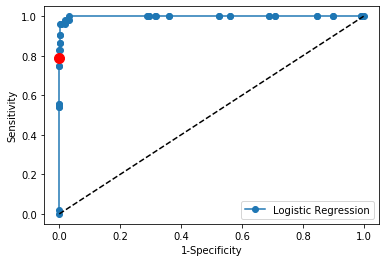

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()


In [26]:
# roc curve 아래의 면적 
from sklearn.metrics import auc

auc = auc(fpr, tpr)
auc

0.9987842306611625

## 3. 새로운 cutoff value로 모델 예측하기 

In [27]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

- tpr은 높을수록 좋고 fpr은 낮을수록 좋으므로 tpr과 fpr간의 차이가 가장 큰 값을 optimal_idx로 선정한다

In [28]:
optimal_threshold

0.00989764664871611

In [29]:
predict_new = np.where(prob>optimal_threshold, 1, 0)

In [30]:
# 새로운 cutoff value로 분류한 confusion matrix 
cm2 = confusion_matrix(predict_new, y_test)
cm2

array([[6898,    1],
       [ 220,   51]], dtype=int64)

In [31]:
cm2_df = pd.DataFrame(cm2, index=['Predicted 0', 'Predicted 1'], columns=['Actual 0', 'Actual 1'])
cm2_df

,Actual 0,Actual 1
Predicted 0,6898,1
Predicted 1,220,51


- optimal_threshold를 찾기 이전의 모델에 비해 정확도가 떨어지지만, <br>
fn, 즉 실제 사기인데 사기라고 예측하지 못한 경우가 11건에서 1건으로 줄고 tp가 41건에서 51건으로 증가하였다. 

In [32]:
tn, fp, fn, tp = cm2[0][0], cm2[1][0], cm2[0][1], cm2[1][1]
(tn, fp, fn, tp)

(6898, 220, 1, 51)

In [33]:
accuracy = (tn+tp)/(tn+tp+fp+fn)
print("accuracy: ", accuracy)

accuracy:  0.9691771269177127


In [34]:
precision = tp / (tp+fp)
recall = tp / (tp+fn)
specificity = tn / (tn+fp)
f1_score = 2*(precision*recall)/(precision+recall)

In [35]:
print("precision: ", precision)
print("recall: ", recall)
print("specificity: ", specificity)
print("f1_score: ", f1_score)

precision:  0.1881918819188192
recall:  0.9807692307692307
specificity:  0.969092441697106
f1_score:  0.3157894736842105


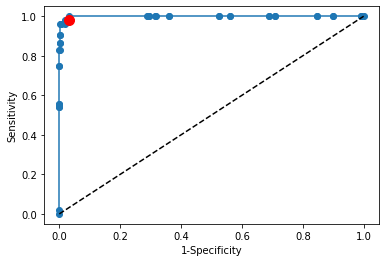

In [36]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-(tn / (fp+tn))], [tp / (fn+tp)], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

#### Q. cutoff value를 바꿔서 나온 결과의 의의는 무엇일까요 ? 

- cutoff value가 이전보다 낮아짐에 따라 사기라고 예측하는 건수가 증가하였는데, <br>
비록 accuracy는 떨어졌지만, recall(=sensitivity)은 증가하여 실제 사기를 잘 예측할 수 있었다. <br>
credit fraud와 같은 skewed data의 경우에는 accuracy만을 보기보다는 recall를 확인함으로써 모델의 성능을 파악해야 함을 알 수 있었다. 